## Data Analysis and Visualization of Play Store Data to extract insights from it.

### Importing Required Libraries and reading CSV file

In [77]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV File
df = pd.read_csv("Google Play Store Dataset.csv")

# Seeing First 6 rows to get the structure of dataset
print("Dataset is:\n")
df.head()

Dataset is:



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Seeing the Columns and shape of Dataset

In [78]:
print("Columns of Dataset are:\n")
print(df.columns)

print("\nShape of Dataset is:\n")
print(df.shape)

Columns of Dataset are:

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Shape of Dataset is:

(10841, 13)


### Seeing Information of the dataset

In [79]:
print("Information about dataset is:\n")
df.info()

Information about dataset is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Checking for duplicates

In [80]:
duplicate_columns = df.columns[df.apply(lambda x: x.duplicated(keep=False)).any()].tolist()

print("Columns with duplicate values in the dataset are:\n")

if duplicate_columns:
    print(duplicate_columns)
else:
    print("No duplicate values found in any column in the dataset")

# Checking for Null values
print("\nNull Values in the dataset are:\n")
print(df.isna().sum())

Columns with duplicate values in the dataset are:

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Null Values in the dataset are:

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


### Handling Duplicates and Missing Values

In [81]:
# Dropping missing values
df.dropna(inplace = True)

# Dropping duplicate values
df.drop_duplicates(keep = "first", inplace = True)

### Seeing Count of Duplicated Values

In [82]:
print("Count of Duplicate values is:", df.duplicated().sum())

Count of Duplicate values is: 0


### Seeing Information of the dataset after dropping values

In [83]:
print("Information about dataset after dropping values is:\n")
df.info()

Information about dataset after dropping values is:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


### Descriptive Statistics of Dataset

In [84]:
print("Descriptive Statistics about dataset after dropping values is:\n")
df.describe(include = "all")

Descriptive Statistics about dataset after dropping values is:



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8886,8886,8886.000000,8886,8886,8886,8886,8886,8886,8886,8886,8886,8886
unique,8190,33,NaN,5990,413,19,2,73,6,115,1299,2638,31
top,ROBLOX,FAMILY,NaN,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1717,NaN,82,1468,1485,8275,8275,7089,732,291,1258,1987
mean,NaN,NaN,4.187959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.522428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing Outliers using z score

- The z-score is a statistical measure that quantifies how far a data point is from the mean of a group of data. It is expressed in terms of standard deviations from the mean. 

- The formula for calculating the z-score of a data point X in a distribution with mean μ and standard deviation σ is given by:

`[ z = (X − μ) / σ ] `

Here's the explanation of code:

```
# Calculating z-scores for the 'Rating' column
z_scores = np.abs((df['Rating'] - df['Rating'].mean()) / df['Rating'].std())

# Removing outliers: keeping rows within 3 standard deviations
df = df[z_scores < 3]

```

1. In this code snippet, the z-scores for each data point in the 'Rating' column are calculated. The formula subtracts the mean of the 'Rating' column from each rating, divides by the standard deviation, and takes the absolute value to ensure that the direction (above or below the mean) is not considered.

2. Then, rows where the absolute z-score is less than 3 are kept, meaning that data points within 3 standard deviations from the mean are retained, and those outside this range are considered outliers and removed from the DataFrame.

3. This is a common approach to identify and handle outliers in a dataset by excluding data points that are too far from the mean. The threshold of 3 standard deviations is often used as a rule of thumb, but it can be adjusted based on the specific characteristics of the data.

In [85]:
# Removing Outliers
z_scores = np.abs((df['Rating'] - df['Rating'].mean()) / df['Rating'].std())
df = df[z_scores < 3]  # Keep rows within 3 standard deviations

### Descriptive Statistics about dataset after removing outliers

In [86]:
print("Descriptive Statistics about dataset after dropping values is:\n")
df.describe(include = "all")

Descriptive Statistics about dataset after dropping values is:



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8714,8714,8714.000000,8714,8714,8714,8714,8714,8714,8714,8714,8714,8714
unique,8020,33,NaN,5972,408,19,2,72,6,115,1291,2604,31
top,ROBLOX,FAMILY,NaN,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1693,NaN,75,1463,1481,8115,8115,6931,705,290,1254,1949
mean,NaN,NaN,4.229458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.430066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing Symbols from columns

In [87]:
print("Installs Column is:\n")
print(df['Installs'].head())

print("\nReviews Column is:\n")
print(df['Reviews'].head())


# Change the data type of Installs column to numrical data type and remove the commma and the plus symbols:
df['Installs'] = df['Installs'].str.replace('+', '', regex = True)  # Remove '+' sign
df['Installs'] = df['Installs'].str.replace(',', '', regex = True)  # Remove ',' sign

df['Installs'] = df['Installs'].astype(int)  # Convert data type to int

# Change the data type of Reviews column to numrical data type:
df['Reviews'] = df['Reviews'].astype(int)  # Convert data type to int+

print("Installs Column after removing symbols + and , is:\n")
print(df['Installs'].head())

print("\nReviews Column after converting to int is:\n")
print(df['Reviews'].head())

Installs Column is:

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Reviews Column is:

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object
Installs Column after removing symbols + and , is:

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

Reviews Column after converting to int is:

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32


## Data Visualization

### Bar Plot with Category Count

#### **_Key Findings_**

- Family Categories apps are the most present in this dataset.
- In other words play store has a lot of apps with family category.
- The next most populat category is Game.
- After this the next most popular is Tools which mostly include apps for utility tools.

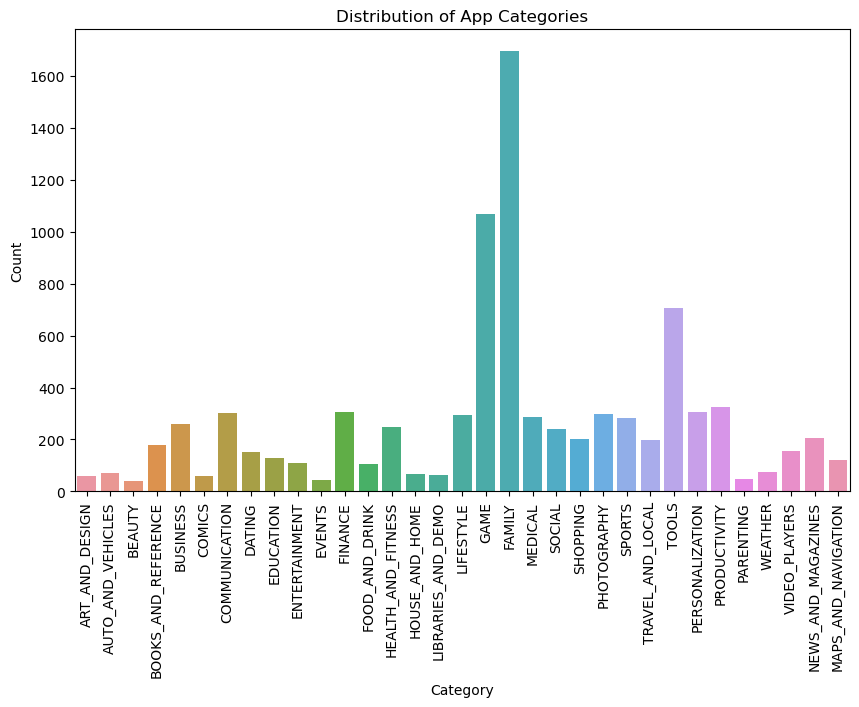

In [88]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.xticks( rotation=90)
plt.ylabel('Count')
plt.title('Distribution of App Categories')

# To show PLot
plt.show()

### Scatter Plot with Reviews and Rating Count

#### **_Key Findings_**

- The most number of Ratings are present with 0 (No Reviews) in this dataset.
- In other words most people only give rating without any reviews.
- Also most apps have been given high rating which may be understood as the reason for no review, since the user may be satisfied with the app but does not have the time to write a detailed review.
- This tells us that most ratings do not have a simulataneous review associated.
- This also tell us about a general user behaviour that users do not like to give their time to write a detailed review, they instead prefer the quick rating feature.

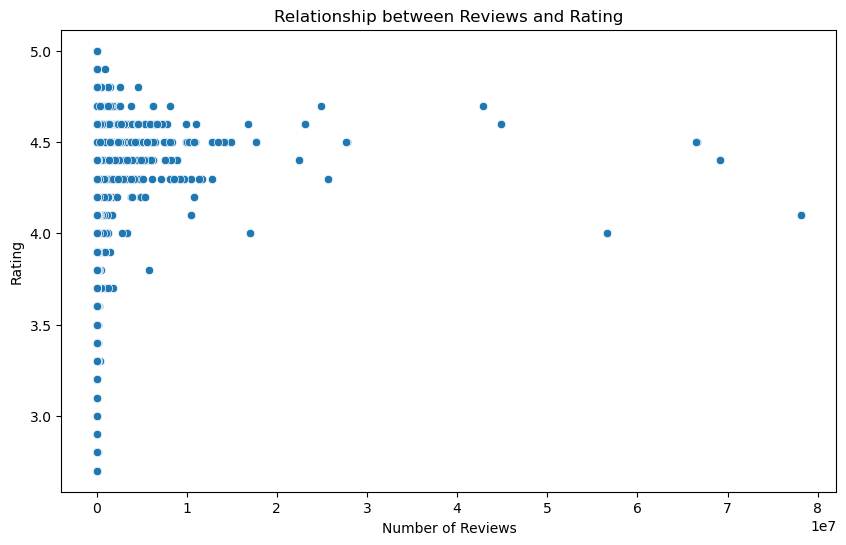

In [89]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x='Reviews', y='Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Relationship between Reviews and Rating')

# To show Plot
plt.show()

### Box Plot with Category and Installs

#### **_Key Findings_**

- No particular trend can be seen here.
- We can see that most points are outliers or noise.

Text(0.5, 1.0, 'Distribution of Installs across Categories')

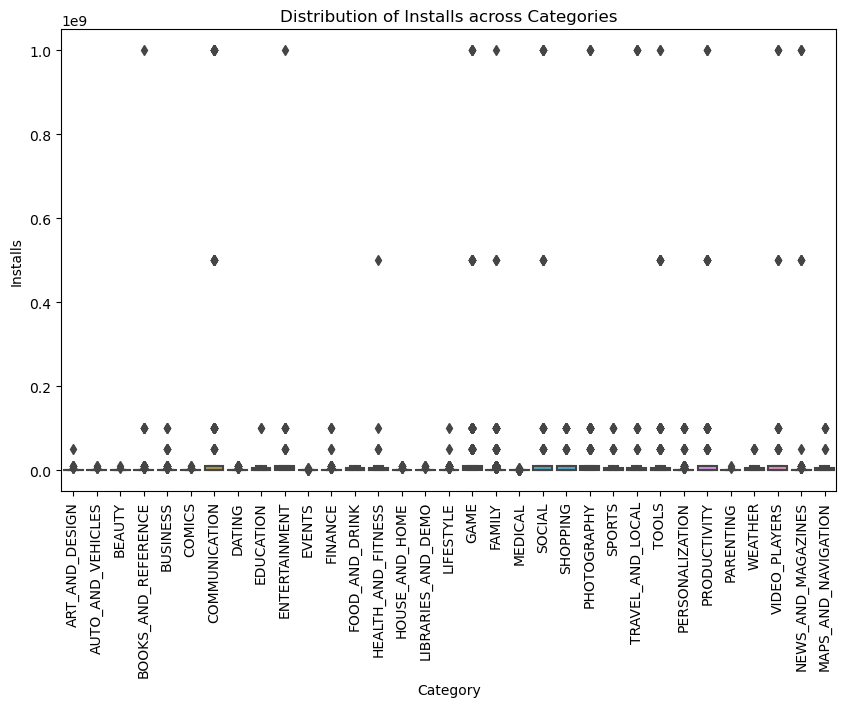

In [90]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x='Category', y='Installs')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Distribution of Installs across Categories')

### Bar Plot with Category and Installs

#### **_Key Findings_**

- Communication apps are the most installed apps.
- This reveals that users are particularly inclined towards communication apps in terms of installation.
- The next most instlled category is social which is pretty obvious looking at the popularity of social media apps today.
- Video Players category apps are also installed in good amount.
- Productivity apps are also installed in good amount.

Text(0.5, 1.0, 'Bar Plot Distribution of Installs across Categories')

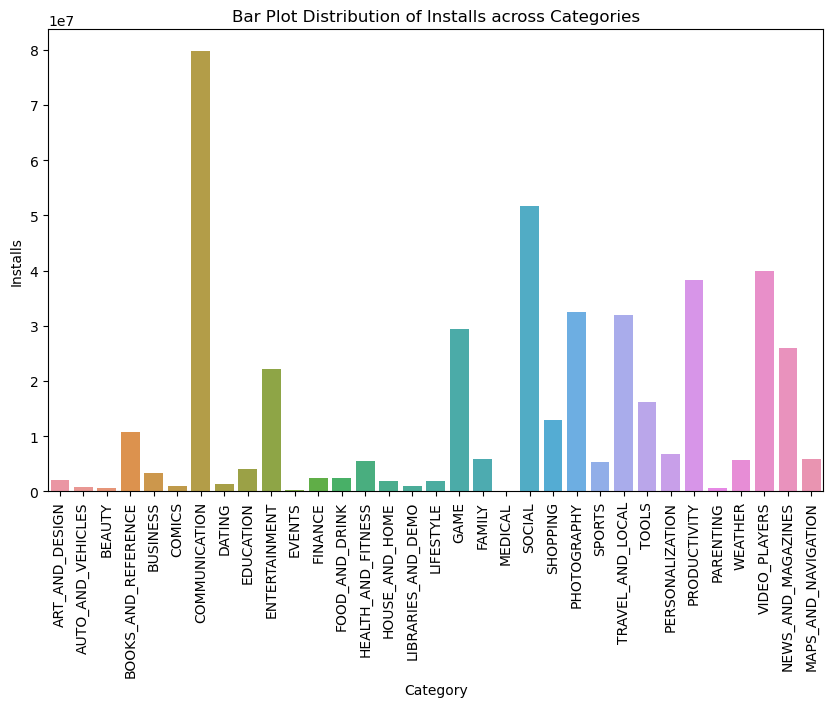

In [91]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data = df, x='Category', y='Installs', errorbar=None)
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Bar Plot Distribution of Installs across Categories')

## Test and its formula

- The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. - In this case, we are performing an independent samples t-test to compare the mean ratings of free and paid apps.

### Independent Samples T-Test:

The independent samples t-test is used when you have two independent groups, and you want to compare the means of a continuous variable between these groups.

**Null Hypothesis (H0):** There is no significant difference between the means of the two groups.

**Alternative Hypothesis (H1)):** There is a significant difference between the means of the two groups.

### Formula for T-Test:


` t = (~X1 - ~X2)/ ( sqrt( ( s1 ^2 / n1) + ( s2 ^2 / n2) ) `

where:
- ~X1 and ~X2 are the sample means of the two groups.
- s1 and s2 are the sample standard deviations of the two groups.
- n1 and n2 are the sample sizes of the two groups.

### Explanation of the Code:

1. **Splitting the dataset:**
   ```python
   free_apps = df_store[df_store['Type'] == 'Free']
   paid_apps = df_store[df_store['Type'] == 'Paid']
   ```
   - This code separates the dataset into two groups: free apps and paid apps.
   
   <br>

2. **Performing the T-Test:**
   ```python
   t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])
   ```
   - The `ttest_ind` function from `scipy.stats` calculates the t-statistic and p-value for the t-test.

<br>

3. **Checking the P-value:**
   ```python
   if p_value < 0.05:
       print("Reject null hypothesis: There is a significant difference in ratings.")
   else:
       print("Fail to reject null hypothesis: There is no significant difference in ratings.")
   ```
   - If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant difference in ratings. Otherwise, we fail to reject the null hypothesis.

### **_The t-test helps us infer whether the observed difference in ratings between free and paid apps is statistically significant or could have occurred by random chance._**

In [92]:
# Importing t test
from scipy.stats import ttest_ind

# Splitting the dataset into free and paid apps
free_apps = df[df['Type'] == 'Free']
paid_apps = df[df['Type'] == 'Paid']

# Performing t-test
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])

# Printing Value of P
print("P value is:", p_value)
print()

# Checking the p-value
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in ratings.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in ratings.")

P value is: 6.283203579258039e-06

Reject null hypothesis: There is a significant difference in ratings.


### Plotting Bar plot For Easier Understanding

### **Total Count of Values with respect to time**

#### **_Key Findings_**

- Free Apps are present in more amount compared to Paid apps.
- Looking at the count its obvious that users like free apps more as they are present in more amount.
- Since users are more inclined towards free apps, we can see that play store has more Free apps in comparison to Paid Apps.

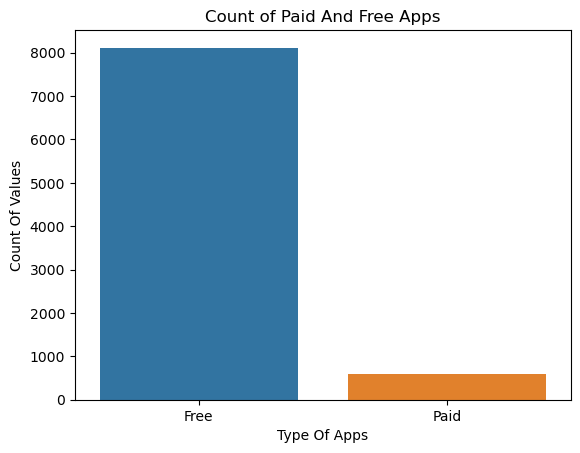

In [93]:
# Plotting Count plot
sns.countplot(x = 'Type', data = df)

plt.title("Count of Paid And Free Apps")
plt.xlabel("Type Of Apps")
plt.ylabel("Count Of Values")

# To Show the Plot
plt.show()

### Count Plot of Type with Rating as Hue Parameter

#### **_Key Findings_**

- Free Apps are present in more amount compared to Paid apps.
- Looking at the count its obvious that users like free apps more as they are present in more amount.
- Since users are more inclined towards free apps, we can see that play store has more Free apps in comparison to Paid Apps.
- Now also coming to ratings we can see that most Free apps has mostly good rating.
- Paid Apps are less in number but generally most of them has good rating.
- Paid Apps usually have ratings more than 3.7.
- This reveals that the quality of Paid Apps is better reflected by the Good Ratings.

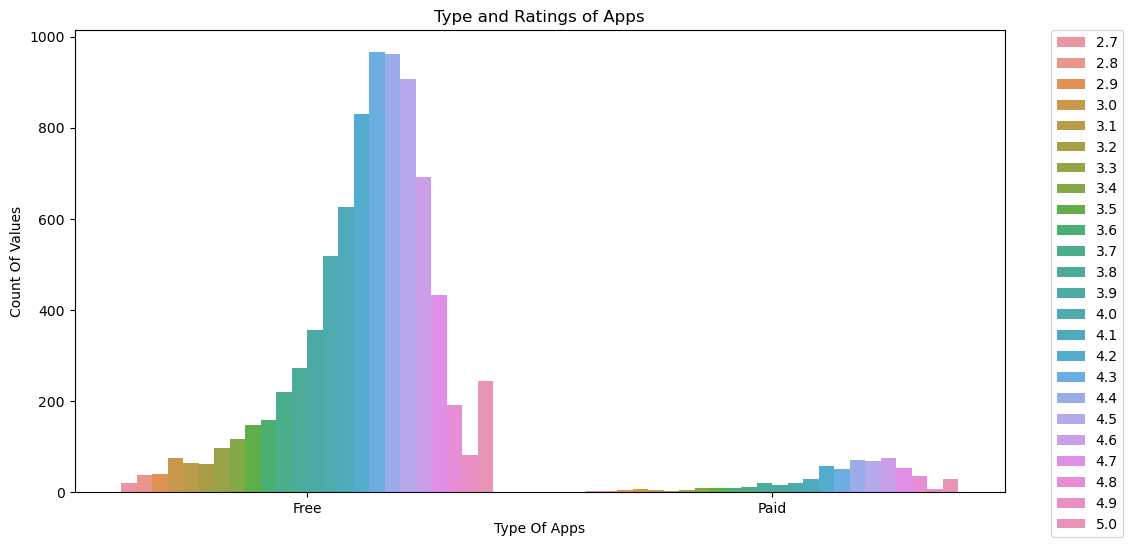

In [94]:
# Size of Figure
plt.figure(figsize=(12, 6))

# Plotting
sns.countplot(x='Type', hue = 'Rating', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Adding Title and Labels
plt.title("Type and Ratings of Apps")
plt.xlabel("Type Of Apps")
plt.ylabel("Count Of Values")

# To Show the Plot
plt.show()

### Count Plot of Rating with Type as Hue Parameter

#### **_Key Findings_**

- Free Apps are present in more amount compared to Paid apps.
- Looking at the count its obvious that users like free apps more as they are present in more amount.
- Since users are more inclined towards free apps, we can see that play store has more Free apps in comparison to Paid Apps.
- Now also coming to ratings we can see that most Free apps has mostly good rating.
- Paid Apps are less in number but generally most of them has good rating.
- Paid Apps usually have ratings more than 3.7.
- This reveals that the quality of Paid Apps is better reflected by the Good Ratings.

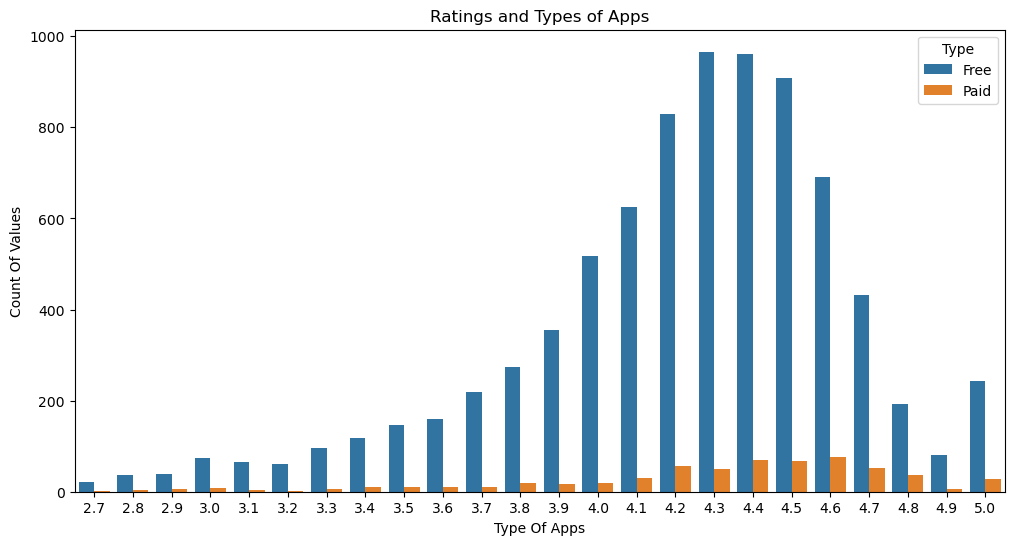

In [95]:
# Size of Figure
plt.figure(figsize=(12, 6))

# Plotting
sns.countplot(x='Rating', hue = 'Type', data = df)

# Adding Title and Labels
plt.title("Ratings and Types of Apps")
plt.xlabel("Type Of Apps")
plt.ylabel("Count Of Values")

# To Show the Plot
plt.show()

### Box Plot of Ratings

#### **_Key Findings_**

- Most Apps has Good Rating Score Reflected by the box between 4.0 and 4.5.
- Few apps has lesser ratings than 3.0 and most apps has rating above that.

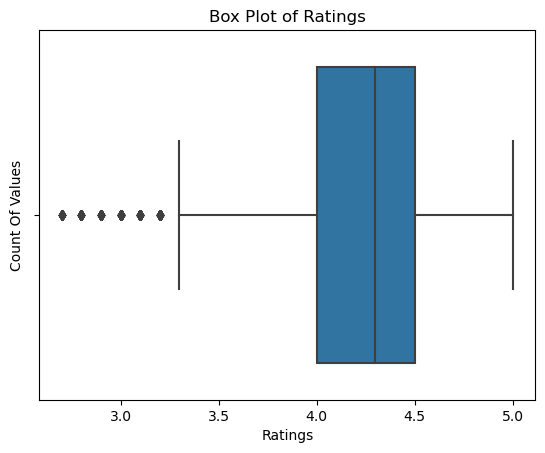

In [96]:
sns.boxplot(x='Rating', data = df)

# Adding Title and Labels
plt.title("Box Plot of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count Of Values")

# To Show the Plot
plt.show()

### Box Plot of Reviews

#### **_Key Findings_**

- The most number of Reviews are present with 0 (No Reviews) in this dataset.
- In other words most people only give rating without any reviews.
- This tells us that most ratings do not have a simulataneous review associated.
- This also tell us about a general user behaviour that users do not like to give their time to write a detailed review, they instead prefer the quick rating feature.

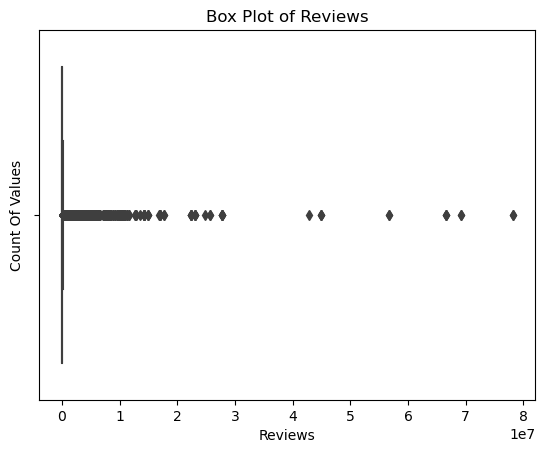

In [97]:
sns.boxplot(x='Reviews', data = df)

# Adding Title and Labels
plt.title("Box Plot of Reviews")
plt.xlabel("Reviews")
plt.ylabel("Count Of Values")

# To Show the Plot
plt.show()

### Scatter Plot between Rating and Installs with category as hue parameter

#### **_Key Findings_**

- Most Apps has good Rating Score.
- The more the rating is, the more installs are there.
- With this we can understand that ratings have a lot of effect on the number of installation.
- Apps with lesser ratings have lesser number of installs as well.

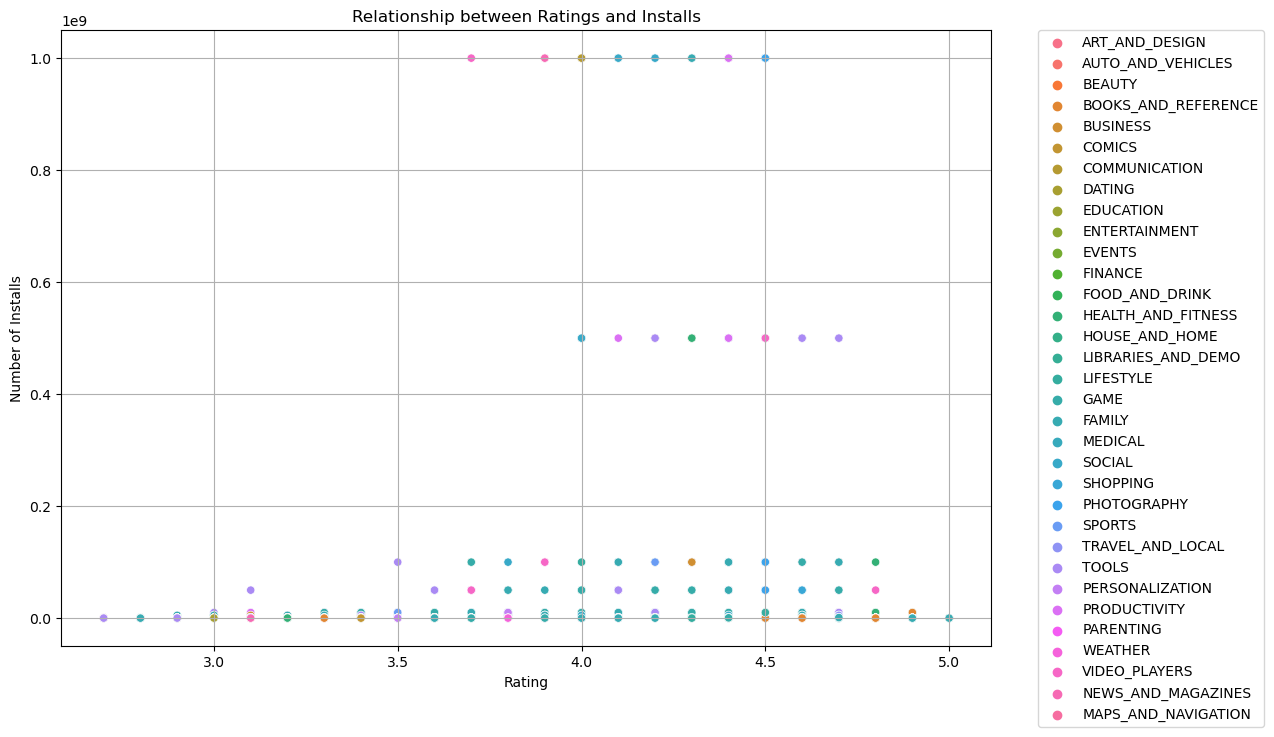

In [98]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='Rating', y='Installs', hue='Category')

plt.grid(True)
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Ratings and Installs')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Line plot of Average Rating over Time

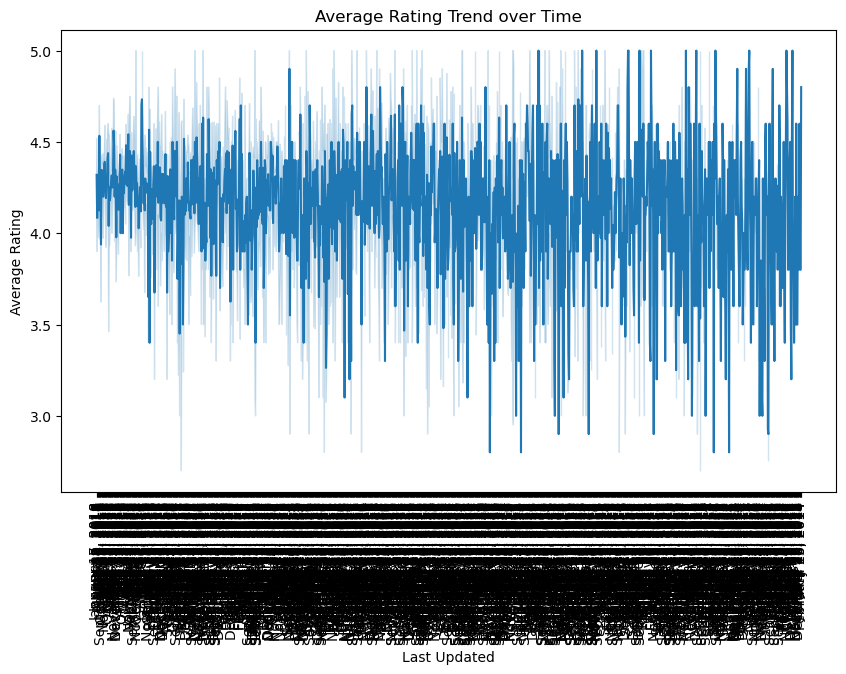

In [99]:
# Line plot of Average Rating over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Last Updated', y='Rating')

# Adding Labels
plt.xlabel('Last Updated')
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time')
plt.xticks(rotation = 90)

# To show Plot
plt.show()

### Aggregating to monthly ratings

In [100]:
# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Set 'Last Updated' as the index
df.set_index('Last Updated', inplace=True)

# Resample 'Rating' to monthly frequency
df_monthly = df['Rating'].resample('M').mean()

### Scatter Plot of Average Rating Trend over Time (Monthly)

#### **_Key Findings_**

- With Updates the ratings are usually good for apps.
- Between 2011 - 2013 most apps have good ratings compared to updates.
- We can also understand that during this time most apps update were preferred by people reflecting in the good ratings.

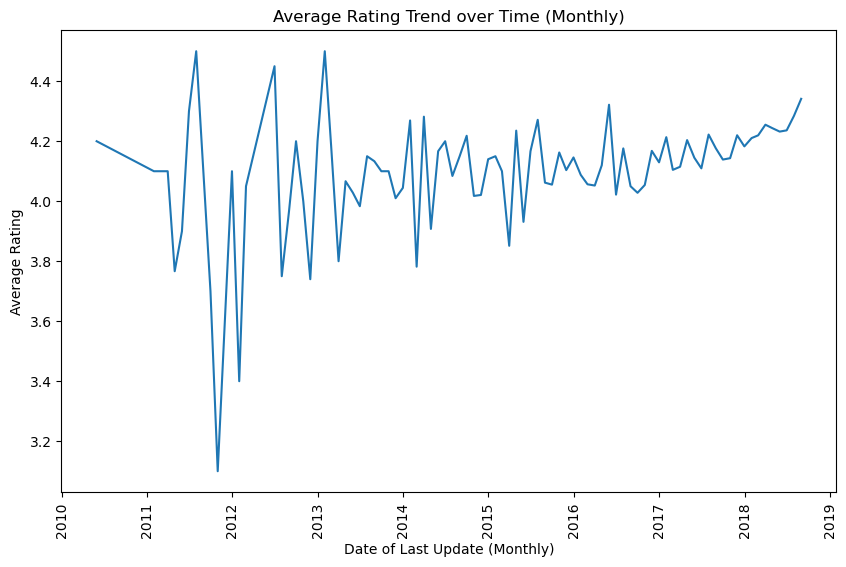

In [101]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly)
plt.xlabel('Date of Last Update (Monthly)')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time (Monthly)')
plt.show()

## Welcome to this presentation on analysis of the Google Play Store data. 

- **This are some of the computed results and key findings from this Analysis**.

<br>

- As we noted in this analysis, the head of the DataFrame consist of columns such as "App," "Category," "Rating," 
"Reviews," "Size," "Installs," "Type," "Price," "Content Rating," "Genres," "Last Updated," "Current Ver," and 
"Android Ver." 
    
    <br>
    
- Each column held valuable insights waiting to be extracted.

### Now, let's dive into some of the computed results and key findings that emerged from this analysis:


### **_Ratings Distribution:_** 

- Examination of the distribution of app ratings and observed a diverse range of scores, indicating varying levels of 
user satisfaction. 

- This insight can help developers understand the quality of their apps and make improvements accordingly.

### **_Category Analysis:_** 

- By analyzing the distribution of apps across different categories, we gained insights into the most popular app categories
on the Google Play Store. 

- This information can assist developers in identifying lucrative niches and making informed decisions about their app development strategies.

### **_Pricing Patterns:_**

- We explored the pricing patterns of apps and identified trends in the relationship between price and user engagement. 
- This knowledge can guide developers in determining optimal pricing strategies for their apps.


### **_Content Rating Analysis:_** 

- By examining the distribution of content ratings, we gained insights into the target audience of various apps. 
- This information is crucial for developers to ensure that their content aligns with the intended user demographic.

### **_Update Frequency:_** 

- We analyzed the last update dates of apps and identified patterns in terms of update frequency. 
- This insight can help developers understand the importance of regular updates for maintaining user engagement and satisfaction.

- These findings merely scratch the surface of the vast possibilities that lie within the Google Play Store data. 
- They provide a glimpse into the complex ecosystem of mobile apps and offer valuable insights for developers, marketers, 
and decision-makers in the industry.

### **_Conclusion_**

- This analysis of the Google Play Store data has revealed  patterns and insights about app ratings, 
categories, pricing, content ratings, and update frequency. 

- These findings can inform strategic decision-making, app development strategies, and user engagement efforts.